In [1]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel

In [2]:
from pylabel import importer

In [3]:
#Specify path to the coco.json file
path_to_annotations = "bbox-annotations.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = "images/"

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="coco")
dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,images/,image_000000001.jpg,,0,1024,768,,,846,145,...,[],0,,,,1,person,none,,1
1,images/,image_000000001.jpg,,0,1024,768,,,848,216,...,[],0,,,,1,person,none,,1
2,images/,image_000000001.jpg,,0,1024,768,,,74,159,...,[],0,,,,2,car,none,,1
3,images/,image_000000001.jpg,,0,1024,768,,,153,124,...,[],0,,,,2,car,none,,1
4,images/,image_000000002.jpg,,1,1024,576,,,488,281,...,[],0,,,,1,person,none,,1


In [7]:
dataset.df.cat_id.unique()

array(['1', '2'], dtype=object)

In [8]:
dataset.df['cat_id'].replace('1', '0', inplace = True)
dataset.df['cat_id'].replace('2', '1', inplace = True)

In [9]:
dataset.df.cat_id.unique()

array(['0', '1'], dtype=object)

In [10]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 2239
Number of classes: 2
Classes:['person', 'car']
Class counts:
person    10800
car        5972
Name: cat_name, dtype: int64
Path to annotations:
.


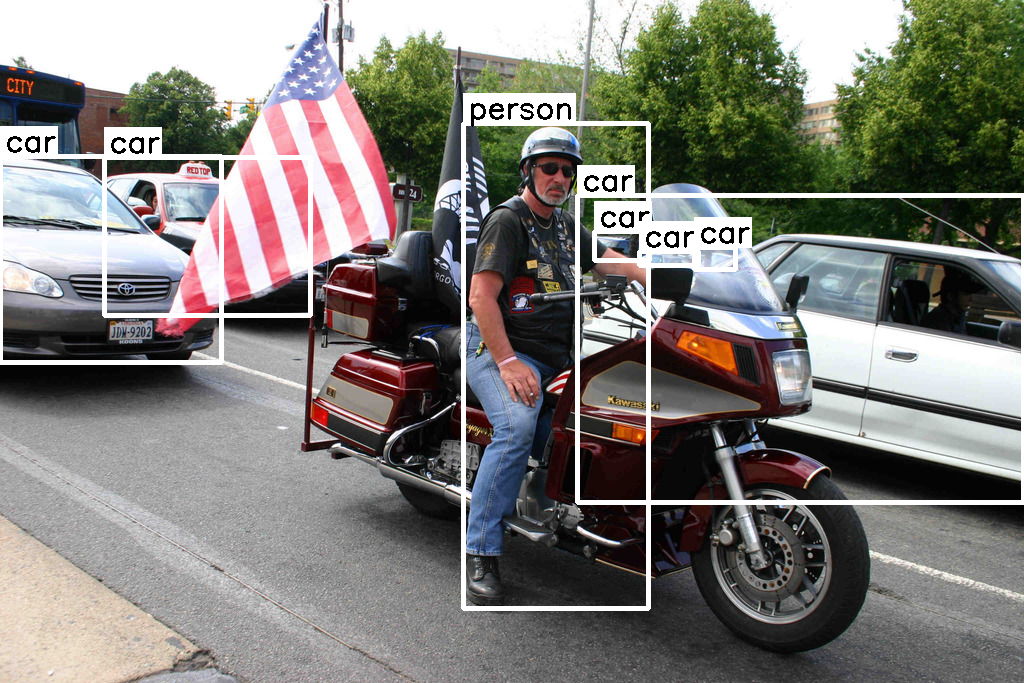

In [6]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))
# display(dataset.visualize.ShowBoundingBoxes("images/image_000000001.jpg"))

In [11]:
dataset.path_to_annotations = "data/yolo"
dataset.export.ExportToYoloV5()[0]

'training\\dataset.yaml'